In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_data(var,channel,dir='../build/'):
    return np.loadtxt(dir+'h'+var+'_'+channel+'.hst')
def load_exp(var,dir='../experiment/'):
    return np.loadtxt(dir+var+'.txt')

In [3]:
colList=['3S1_cs','3S1_co','1S0_co','3P0_co'];

In [4]:
# LDME
mc=1.5;
LDME={};
def set_LDME(r):
    LDME['3S1_cs']=0.270;
    LDME['3S1_co']=6.6e-3;
    LDME['1S0_co']=2.2e-2*3/(3*r + 1);
    LDME['3P0_co']=2.2e-2*3*mc**2*r/(3*r + 1);
set_LDME(10);
print(LDME)

{'1S0_co': 0.0021290322580645163, '3S1_co': 0.0066, '3P0_co': 0.04790322580645162, '3S1_cs': 0.27}


In [5]:
def add(A,B):
    return np.array([ [A[i,0],A[i,1]+B[i,1]] for i in range(len(A))])
def mult(A,B):
    return np.array([ [A[i,0],A[i,1]*B[i,1]] for i in range(len(A))])
def div(A,B):
    return np.array([ [A[i,0],A[i,1]/B[i,1]] for i in range(len(A))])
def multC(c, A):
    return np.array( [ [A[i,0],c*A[i,1]] for i in range(len(A))])

In [30]:
data={};
def sum_th(var,r):
    set_LDME(r);
    all=multC(0,load_data(var,'3S1_cs'))
    for ch in colList:
        data[ch]=multC(LDME[ch],load_data(var,ch))
        all = add(all,data[ch])
    return all
(rMin, rMax)=(0,1)

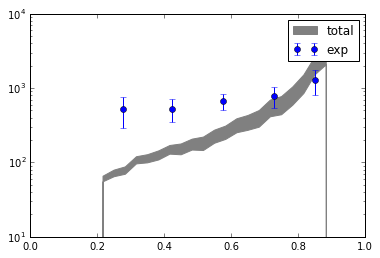

In [34]:
var='Z'
allMin=sum_th(var,r=rMin);
allMax=sum_th(var,r=rMax);
exp_data=load_exp(var);
plt.fill_between(allMin[:,0],allMin[:,1],allMax[:,1],color='gray',label='total');
#for ch in colList:
#    plt.plot(data[ch][:,0],data[ch][:,1],label=ch)
plt.errorbar(exp_data[:,0],exp_data[:,1],fmt='o',yerr=exp_data[:,2],label='exp')
plt.legend(loc='best')
plt.yscale('log')

In [ ]:
data={};
var='PT2';
all=multC(0,load_data(var,'3S1_cs'))
for ch in colList:
    data[ch]=multC(LDME[ch],load_data(var,ch))
    all = add(all,data[ch])
exp_data=load_exp(var)

plt.plot(all[:,0],all[:,1],'k',linewidth=3.0,label='total');
for ch in colList:
    plt.plot(data[ch][:,0],data[ch][:,1],label=ch)
plt.errorbar(exp_data[:,0],exp_data[:,1],fmt='o',yerr=exp_data[:,2],label='exp')
plt.legend(loc='best')
plt.yscale('log')

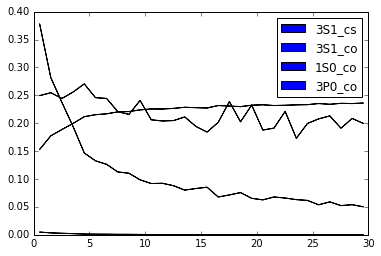

In [27]:
ratMin={};
ratMax={};
for ch in colList:
    ratMin[ch]=div(data[ch],allMin)
    ratMax[ch]=div(data[ch],allMin)
    plt.fill_between(ratMin[ch][:,0],ratMin[ch][:,1],ratMax[ch][:,1],label=ch)
plt.legend(loc='best')